# Data Cleaning

### Setup

Please find link to dataset: https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset/code

Dependencies installation checklist :
 - Pandas
 - Matplotlib
 - Seaborn
 - Numpy
 - Scikit (model training)

In [1]:
!pip install pandas matplotlib seaborn numpy scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Define imports:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Load dataset and confirm 

In [3]:
df = pd.read_csv("../data/stroke_risk_dataset.csv")

df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


### Data Cleaning


Goal for this step is to basically figure out if we can trust this data set.

Target approach:
- Check for any null values in all the columns
- Check for any duplicates and drop them if they exist
- Make sure we don't have any incorrect data types
- Spot outliers

In [5]:
print(df.isnull().sum())

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64


As expected we have no null values throughout dataset but good to confirm

In [6]:
print('duplicate rows: ',  df.duplicated().sum())

duplicate rows:  1021


Can deduce from this 1,021 duplicate rows in our dataset. We definitely need to drop these values because we are NOT working with time series input and we want unique patient profiles. They can add noise when trying to make predictions too if we do not drop them!

In [7]:
df = df.drop_duplicates()
print('duplicate rows: ',  df.duplicated().sum())

duplicate rows:  0


In [8]:
df.dtypes

Chest Pain                          int64
Shortness of Breath                 int64
Irregular Heartbeat                 int64
Fatigue & Weakness                  int64
Dizziness                           int64
Swelling (Edema)                    int64
Pain in Neck/Jaw/Shoulder/Back      int64
Excessive Sweating                  int64
Persistent Cough                    int64
Nausea/Vomiting                     int64
High Blood Pressure                 int64
Chest Discomfort (Activity)         int64
Cold Hands/Feet                     int64
Snoring/Sleep Apnea                 int64
Anxiety/Feeling of Doom             int64
Age                                 int64
Stroke Risk (%)                   float64
At Risk (Binary)                    int64
dtype: object

Perfect datatype consistency across dataset and seems fine to keep it as is.

Last step would be outlier analysis. The columns that would make sense to analyse are:
- Age
- Stroke Risk (%)

#### Age Analysis 

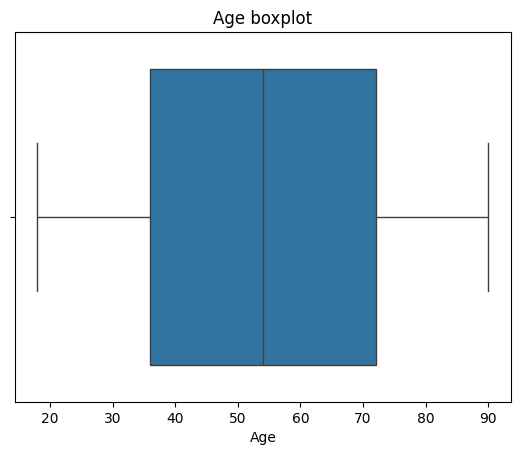

In [9]:
sns.boxplot(x=df['Age'])
plt.title("Age boxplot")
plt.show()

In [10]:
age_min = df['Age'].min()
age_max = df['Age'].max()
print(f"Age range: {age_min} to {age_max} years")

Age range: 18 to 90 years


In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

if outliers.empty:
 print("No outliers found")
else:
  print(f"Outliers found: {len(outliers)}")
  print(outliers[['Age']])

No outliers found


#### Stroke Risk (%) Anaylsis

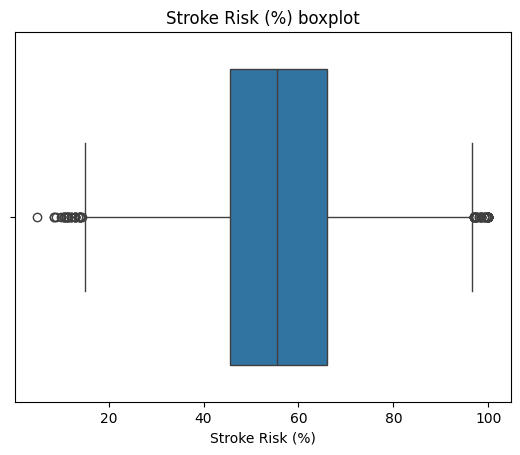

In [12]:
sns.boxplot(x=df['Stroke Risk (%)'])
plt.title("Stroke Risk (%) boxplot")
plt.show()

In [13]:
risk_min = df['Stroke Risk (%)'].min()
risk_max = df['Stroke Risk (%)'].max()
print(f"Stroke Risk range: {risk_min:.2f}% to {risk_max:.2f}%")

Stroke Risk range: 5.00% to 100.00%


In [14]:
Q1 = df['Stroke Risk (%)'].quantile(0.25)
Q3 = df['Stroke Risk (%)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Stroke Risk (%)'] < lower_bound) | (df['Stroke Risk (%)'] > upper_bound)]

if outliers.empty:
 print("No outliers found")
else:
 print(f"Outliers found: {len(outliers)}")
 print(outliers[['Stroke Risk (%)']])
 

Outliers found: 70
       Stroke Risk (%)
2498             100.0
6423              98.5
8544              98.0
8772             100.0
8962              97.5
...                ...
58128             97.0
61361             13.0
64253             13.0
65189             99.5
68195             11.5

[70 rows x 1 columns]


Looks like we have some outliers in the Stroke Risk percentage column, 70 outliers to be precise. We can bascially interpret these values as cases where patients where either at extremely high risk in the upper percentile and vice versa for the lower percentile. 

Does this mean that we should drop these outlier? No, these cases could actually be medically valid and could/will actually play an important role in our predictions later on and therefore should be accounted for.

<Axes: xlabel='Stroke Risk (%)', ylabel='Count'>

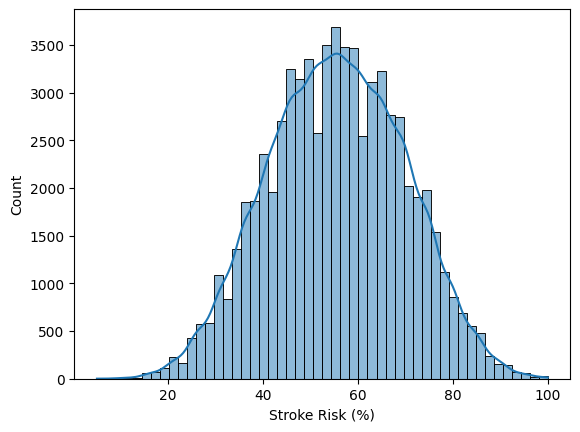

In [18]:
sns.histplot(df['Stroke Risk (%)'], bins=50, kde=True)

*Normal distribution*

Before we conclude that not dropping the outliers is good idea on the stroke risk column, we can do a further check to see if they are actually valid to not drop by comparing them against the at risk binary column.

Obviously if the outlier in the higher range does has any rows where the At risk != 1, that is a problem, and vice versa for the lower percentile so at risk 1= 0. 

Why? Because then the data does not make sense that you have a stroke risk higher than 95% but the at risk value shows 0 which means not at risk.

In [15]:
print(df[df['Stroke Risk (%)'] > 95]['At Risk (Binary)'].value_counts())

At Risk (Binary)
1    73
Name: count, dtype: int64


In [16]:
print(df[df['Stroke Risk (%)'] < 15]['At Risk (Binary)'].value_counts())

At Risk (Binary)
0    32
Name: count, dtype: int64


Yes, both show what we want, all upper percentile outliers show at risk of 1 and vice versa with < 15% having a values of 0.

np.float64(5.0)